<a href="https://colab.research.google.com/github/JeHeeYu/Computer-Vision-Graphics/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir images
!mkdir models


mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘models’: File exists


In [7]:
# age_net.caffemodel
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jdC5QuBpp3yrOsm5_XjlYvqMIZqLUjC7' -O models/age_net.caffemodel

# deploy_age.prototxt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ARLVcyQ6xbQ6-dx9xoe3CcSCPL-zltIQ' -O models/deploy_age.prototxt

# gender_net.caffemodel
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1p1q2vGh5EvyvtsZOKkK4zmKU0SJXRoVN' -O models/gender_net.caffemodel

# deploy_gender.prototxt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QjFXSeKYeQXfiQPx-4za1-DHaCoLOFAz' -O models/deploy_gender.prototxt
!wget 'https://www.cjknews.com/data/photos/20250311/art_17415625486761_d1cee0.jpg' -O images/aesoon.jpg



--2025-04-08 09:43:59--  https://docs.google.com/uc?export=download&id=1jdC5QuBpp3yrOsm5_XjlYvqMIZqLUjC7
Resolving docs.google.com (docs.google.com)... 172.217.203.102, 172.217.203.139, 172.217.203.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jdC5QuBpp3yrOsm5_XjlYvqMIZqLUjC7&export=download [following]
--2025-04-08 09:43:59--  https://drive.usercontent.google.com/download?id=1jdC5QuBpp3yrOsm5_XjlYvqMIZqLUjC7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45661480 (44M) [application/octet-stream]
Saving to: ‘models/age_net.caffemodel’

models/age_net.caff 100%[===================>]  43.5

In [8]:
!pip install numpy==1.26.3
!pip install opencv-python==4.9.0.80

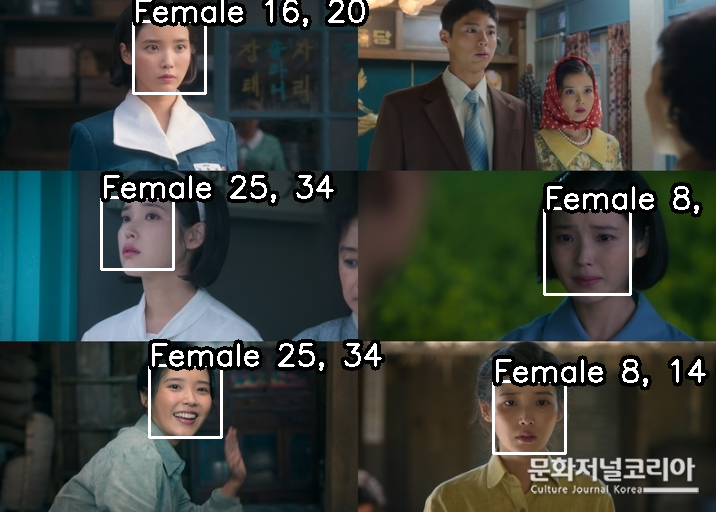

In [9]:
import cv2, glob, dlib
from google.colab.patches import cv2_imshow

age_list = [('0, 2'), ('4, 6'), ('8, 14'), ('16, 20'),
 ('25, 34'), ('40, 45'), ('50, 60'), ('60, 80')]

gender_list = ['Male', 'Female']

detector = dlib.get_frontal_face_detector()

age_net = cv2.dnn.readNetFromCaffe('models/deploy_age.prototxt',
                                   'models/age_net.caffemodel')

gender_net = cv2.dnn.readNetFromCaffe('models/deploy_gender.prototxt',
                                      'models/gender_net.caffemodel')

img_list = glob.glob('images/*.jpg')

for img_path in img_list:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (716, 512))

    faces = detector(img)

    for face in faces:
        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()

        face_img = img[y1:y2, x1:x2].copy()

        blob = cv2.dnn.blobFromImage(face_img,
                                     scalefactor=1,
                                     size=(227, 227),
                                     mean = (78.4263377603, 87.7689143744, 144.895847746),
                                     swapRB=False, crop=False)
        gender_net.setInput(blob)
        gender_pred = gender_net.forward()
        gender = gender_list[gender_pred[0].argmax()]

        age_net.setInput(blob)
        age_pred = age_net.forward()
        age = age_list[age_pred[0].argmax()]

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 255), 2)
        overlay_text = '%s %s' % (gender, age)
        cv2.putText(img, overlay_text, org=(x1, y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0), thickness=10)
        cv2.putText(img, overlay_text, org=(x1, y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255), thickness=2)

cv2_imshow(img)